<a href="https://colab.research.google.com/github/SnehalYu/Tumor-Detection-in-MRI-scans-of-the-brain/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
# Upload the zip file from your local machine
uploaded = files.upload()
import os
# List the files in the current directory
os.listdir()
import zipfile
# Get the name of the uploaded file
filename = list(uploaded.keys())[0]
# Unzip the file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('/content/')
# Check the extracted files
os.listdir('/content/')

yes_folder='/content/brain_tumor_dataset/yes'
no_folder='/content/brain_tumor_dataset/no'

yes_files = [os.path.join(yes_folder, f) for f in os.listdir(yes_folder) if os.path.isfile(os.path.join(yes_folder, f))]
no_files = [os.path.join(no_folder, f) for f in os.listdir(no_folder) if os.path.isfile(os.path.join(no_folder, f))]


Saving kaggle set.zip to kaggle set.zip


Importing the files from kaggle downloaded to the local machine. Unzip the file. Extract the files into the content folder on colab directory. Define the folders containing the yes and no folders.


In [10]:
num_yes_images = len(yes_files)
num_no_images = len(no_files)

images = []
labels = []

print(f"Number of 'yes' labeled images: {num_yes_images}")
print(f"Number of 'no' labeled images: {num_no_images}")

Number of 'yes' labeled images: 155
Number of 'no' labeled images: 98


In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.regularizers import l2


In [16]:
# Define functions for loading and preprocessing images
def load_and_preprocess_image(image_path, img_size=(128, 128)):

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, img_size)
    img = img / 255.0
    return img

def load_images_from_folder(folder, img_size=(128, 128)):
    images = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        if os.path.isfile(file_path):
            img = load_and_preprocess_image(file_path, img_size)
            images.append(img)
    return np.array(images)

# Load and preprocess images
img_size = (128, 128)

yes_images = load_images_from_folder(yes_folder, img_size)
yes_labels = np.ones(len(yes_images))

no_images = load_images_from_folder(no_folder, img_size)
no_labels = np.zeros(len(no_images))

# Combine images and labels
X = np.concatenate((yes_images, no_images), axis=0)
y = np.concatenate((yes_labels, no_labels), axis=0)

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Add a channel dimension
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

#print(f'Training data shape: {X_train.shape}')
#print(f'Training labels shape: {y_train.shape}')
#print(f'Validation data shape: {X_val.shape}')
#print(f'Validation labels shape: {y_val.shape}')


# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(2128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 14, 14, 64)       

In [17]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/50
5/5 [==============================] - 11s 2s/step - loss: 0.6784 - accuracy: 0.5232 - val_loss: 0.6546 - val_accuracy: 0.6078
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 0.6514 - accuracy: 0.6159 - val_loss: 0.6417 - val_accuracy: 0.6078
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 0.6282 - accuracy: 0.6159 - val_loss: 0.6285 - val_accuracy: 0.6078
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 0.6297 - accuracy: 0.6159 - val_loss: 0.6066 - val_accuracy: 0.6275
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 0.6127 - accuracy: 0.7086 - val_loss: 0.6024 - val_accuracy: 0.7255
Epoch 6/50
5/5 [==============================] - 7s 1s/step - loss: 0.5830 - accuracy: 0.7219 - val_loss: 0.5831 - val_accuracy: 0.6078
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 0.5798 - accuracy: 0.6887 - val_loss: 0.5672 - val_accuracy: 0.7059
Epoch 8/50
5/5 [========================

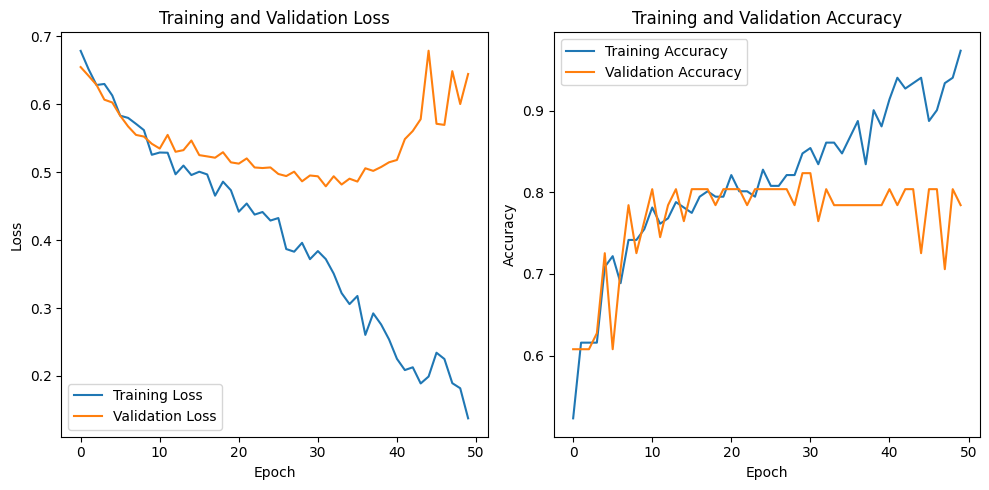

In [18]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

2/2 [==============================] - 1s 267ms/step


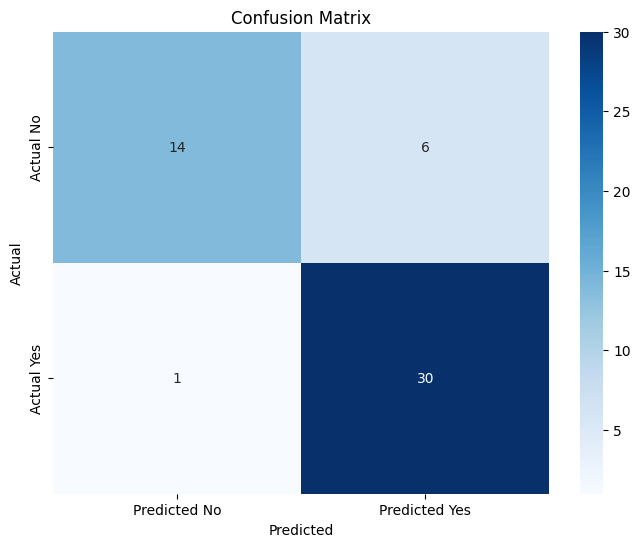

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.70      0.80        20
         1.0       0.83      0.97      0.90        31

    accuracy                           0.86        51
   macro avg       0.88      0.83      0.85        51
weighted avg       0.87      0.86      0.86        51



In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict probabilities for test set
y_pred_probs = model.predict(X_test).flatten()

# Convert probabilities to binary predictions
y_pred = (y_pred_probs > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute precision, recall, f1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)